In [2]:
import numpy as np
import PIL as pillow # pillow module

filename = 'Frida.jpg'
img = np.array(pillow.Image.open( filename )) # matplotlib can only read png files

In [3]:
from scipy import linalg

# img = U * Σ * Vh, SVD of img matrix
# s is a 1D vector consisting of non-zero diagonal values of Σ starting from top left
U, s, Vh = linalg.svd(img)

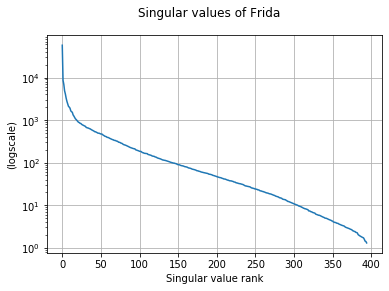

In [4]:
import matplotlib.pyplot as plt

# plot singular values of Frida's image to figure out a good approximation k
fig, ax = plt.subplots()
fig.suptitle("Singular values of Frida")
plt.xlabel('Singular value rank')
plt.ylabel('(logscale)')
plt.yscale("log")
plt.grid(True)
ax.get_ygridlines()
ax.plot(s)
plt.show()

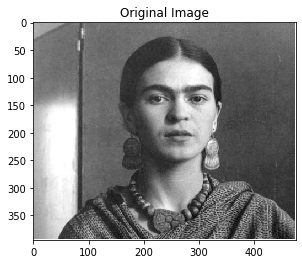

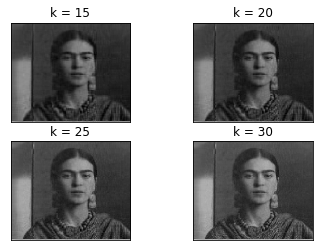

In [5]:
# Original image
fig, axImg = plt.subplots()
axImg.set_title( 'Original Image' )
axImg.xaxis.set_visible( True )
axImg.yaxis.set_visible( True )
axImg.imshow( img, cmap='gray' )

# it seems from the chart above singular values drop less quickly after around the 25th
# so we check to see what happens around this one
fig, axImg = plt.subplots(2, 2)
initial, final, step = 15, 35, 5
for k in range(initial, final, step):
    SVh = np.multiply(s[:k,None],Vh[:k,:])
    img_k = U[:,:k] @ SVh
    title = "k = " + repr(k)
    row_no = (k - initial) // ( 2 * step)
    col_no = ( (k - initial) % ( 2 * step) ) // step
    axImg[row_no, col_no].set_title( title )
    axImg[row_no, col_no].xaxis.set_visible( False )
    axImg[row_no, col_no].yaxis.set_visible( False )
    axImg[row_no, col_no].imshow( img_k, cmap='gray' )